
# Análise de Dados com K-means e Random Forest

## Objetivo da Atividade

Nesta atividade, os alunos irão aplicar técnicas de aprendizado de máquina para analisar dados simulados de um conjunto de estudantes. O objetivo é explorar e interpretar o agrupamento de alunos com o algoritmo **K-means** e, em seguida, utilizar o **Random Forest** para classificar os alunos em níveis de risco de desempenho baixo, médio ou alto.

### Objetivos Específicos

1. **Compreender e interpretar os clusters** gerados pelo K-means, identificando características e comportamentos comuns em cada grupo de alunos.
2. **Utilizar o Random Forest** para classificar alunos em níveis de risco de desempenho, explorando a importância de cada variável no modelo.
3. **Avaliar a acurácia do modelo de classificação** e identificar os principais fatores que influenciam o risco de desempenho dos alunos.

---



## Descrição do Dataset

Para esta atividade, utilizamos um conjunto de dados simulado que representa informações sobre o comportamento de estudo, participação e características demográficas de um grupo de 2000 alunos. Este dataset foi criado para refletir variáveis reais que afetam o desempenho acadêmico.

Cada registro (linha) do dataset corresponde a um aluno, com as seguintes variáveis:

- **Student_ID**: Identificador único de cada aluno.
- **Attendance**: Percentual de presença nas aulas, variando entre 0 e 100%.
- **Assignments_Completed**: Número de tarefas entregues pelo aluno (valor entre 0 e 20).
- **Study_Hours_Per_Week**: Média de horas de estudo semanal do aluno.
- **Previous_Test_Score**: Nota obtida pelo aluno em uma avaliação anterior, como percentual.
- **Forum_Participation**: Número de interações realizadas pelo aluno em fóruns de discussão do curso.
- **Age**: Idade do aluno.
- **Socioeconomic_Status**: Status socioeconômico do aluno, com categorias "Low", "Medium" e "High".
- **Risk_Level**: Nível de risco de desempenho do aluno, classificado como "Alto Risco", "Médio Risco" ou "Baixo Risco".

### Lógica para Classificação de Risco

Os níveis de risco foram atribuídos com base em condições simuladas para refletir diferentes cenários de comportamento de estudo e desempenho:

- **Alto Risco**: Alunos com presença baixa, pouco tempo de estudo semanal e desempenho anterior baixo.
- **Médio Risco**: Alunos com frequência e estudo em níveis intermediários, e desempenho moderado.
- **Baixo Risco**: Alunos com alta presença, muitas horas de estudo e desempenho superior.



## Criação do Dataset Simulado

Abaixo, descrevemos o código utilizado para a criação do dataset:


In [ ]:

# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np

# Definindo o número de alunos
n_students = 2000

# Criação das variáveis com distribuição aleatória
data = {
    "Student_ID": range(1, n_students + 1),
    "Attendance": np.random.normal(80, 10, n_students),  # Presença média em percentual
    "Assignments_Completed": np.random.randint(0, 20, n_students),  # Tarefas entregues
    "Study_Hours_Per_Week": np.random.normal(15, 5, n_students),  # Horas de estudo semanais
    "Previous_Test_Score": np.random.normal(70, 15, n_students),  # Nota de prova anterior em percentual
    "Forum_Participation": np.random.normal(30, 10, n_students),  # Participação em fóruns
    "Age": np.random.randint(18, 35, n_students),  # Idade dos alunos
    "Socioeconomic_Status": np.random.choice(["Low", "Medium", "High"], n_students),  # Status socioeconômico
}

# Conversão para DataFrame
df = pd.DataFrame(data)

# Lógica para atribuir o nível de risco de desempenho
conditions = [
    (df["Attendance"] < 70) & (df["Study_Hours_Per_Week"] < 10) & (df["Previous_Test_Score"] < 50),
    (df["Attendance"] >= 70) & (df["Attendance"] < 85) & (df["Study_Hours_Per_Week"] >= 10) & (df["Previous_Test_Score"] >= 50),
    (df["Attendance"] >= 85) & (df["Study_Hours_Per_Week"] >= 15) & (df["Previous_Test_Score"] >= 60)
]

# Níveis de risco baseados nas condições definidas
risk_levels = ["Alto Risco", "Médio Risco", "Baixo Risco"]
df["Risk_Level"] = np.select(conditions, risk_levels, default="Médio Risco")

# Visualização dos primeiros registros
df.head()


,Student_ID,Attendance,Assignments_Completed,Study_Hours_Per_Week,Previous_Test_Score,Forum_Participation,Age,Socioeconomic_Status,Risk_Level
0,1,65.292901,17,16.552750,59.293733,29.838494,29,Low,Médio Risco
1,2,80.074781,14,13.274352,70.472283,19.711963,18,Medium,Médio Risco
2,3,74.883135,11,17.337933,54.328265,25.163072,24,High,Médio Risco
3,4,78.886784,4,8.052245,103.732014,16.657853,23,High,Médio Risco
4,5,80.241110,12,19.235932,59.465797,24.116648,33,Medium,Médio Risco



# Atividade em Dupla: Análise de Risco Acadêmico com K-means e Random Forest

Nesta atividade, você e seu colega de dupla irão aplicar técnicas de aprendizado de máquina para analisar dados simulados de estudantes, com o objetivo de identificar padrões de comportamento e classificar alunos em diferentes níveis de risco de desempenho acadêmico. Vamos dividir a atividade em etapas simples, onde cada uma será explicada com orientações sobre o que fazer.

## Passo a Passo da Atividade

### 1. Compreenda os Dados

Antes de começar a usar os algoritmos, é essencial entender o que cada coluna do conjunto de dados representa. Isso ajuda a saber quais variáveis podem ser úteis para identificar o risco de desempenho.

**O que fazer:**
- Leia as colunas do dataset. Observe variáveis como:
  - **Attendance (Presença)**: Percentual de frequência nas aulas.
  - **Study_Hours_Per_Week (Horas de Estudo por Semana)**: Quantidade média de horas dedicadas ao estudo semanalmente.
  - **Previous_Test_Score (Nota em Testes Anteriores)**: Desempenho em avaliações anteriores.
- Observe as variáveis com números (presença, horas de estudo, etc.), pois são elas que vamos usar no K-means.

**Dica**: Fazer uma análise básica (como média e desvio padrão) dessas variáveis ajuda a ver como os dados estão distribuídos. Isso será útil para entender melhor os grupos que vamos criar.

### 2. Agrupe os Alunos com K-means

O **K-means** cria grupos de dados que possuem características semelhantes. Aqui, vamos usá-lo para identificar diferentes perfis de alunos, como aqueles que participam mais ou menos das atividades.

**O que fazer:**
- Escolha quantos grupos (clusters) deseja formar. Um bom começo é tentar entre 3 e 5 grupos. O ideal é testar diferentes quantidades e observar o comportamento dos grupos formados.
- Utilize variáveis como **Attendance**, **Study_Hours_Per_Week**, **Assignments_Completed** (tarefas concluídas) e **Previous_Test_Score** para formar os grupos.

**Dica**: A escolha do número de grupos pode ser feita pelo método do cotovelo (Elbow Method), que mostra graficamente o ponto onde os grupos começam a perder a qualidade. Peça ajuda ao instrutor ou consulte um tutorial para entender como o método do cotovelo funciona.

**Resultado Esperado**: Depois de aplicar o K-means, você verá grupos de alunos com características semelhantes. Interprete os grupos e pense no que os diferencia (por exemplo, um grupo com alta presença e boas notas pode indicar alunos dedicados).

### 3. Atribua um Nível de Risco a Cada Aluno

Depois de formar os grupos, o próximo passo é criar rótulos para classificar o risco de desempenho dos alunos. Baseado nas características dos grupos, você pode atribuir rótulos de **alto risco**, **médio risco** ou **baixo risco** de desempenho.

**O que fazer:**
- Analise os clusters criados no passo anterior. Por exemplo:
  - Alunos com baixa presença e poucas horas de estudo podem ser classificados como **alto risco**.
  - Alunos com frequência e estudo intermediários podem ser **médio risco**.
  - Alunos com alta presença e bom desempenho podem ser **baixo risco**.
- Adicione esses rótulos ao dataset, criando uma coluna para o nível de risco.

**Dica**: Converse com o grupo sobre os critérios de cada nível de risco. Isso ajudará a definir um padrão lógico e consistente para todos os alunos.

### 4. Treine o Random Forest para Classificar o Risco

Agora, vamos usar o **Random Forest**, um algoritmo de classificação, para identificar automaticamente o nível de risco dos alunos. A ideia é treinar o modelo com os dados rotulados (etiquetados) para que ele consiga classificar novos alunos futuramente.

**O que fazer:**
- Divida o dataset em duas partes: uma para treinar o modelo e outra para testá-lo.
- Use as colunas **Attendance**, **Study_Hours_Per_Week**, **Assignments_Completed**, **Forum_Participation**, entre outras, como variáveis de entrada. A coluna **Risk_Level** será a variável alvo (a que o modelo tentará prever).
- Treine o modelo com o Random Forest para que ele consiga classificar o nível de risco dos alunos com base nas variáveis comportamentais e demográficas.

**Dica**: O Random Forest permite ver quais variáveis têm maior importância na classificação. Isso significa que você poderá saber quais fatores (como presença ou horas de estudo) são mais relevantes para definir o risco.

### 5. Avalie o Modelo

Após treinar o modelo, avalie o quão bem ele classifica os alunos nos níveis de risco.

**O que fazer:**
- Use uma parte dos dados que não foi usada no treinamento para testar o modelo.
- Calcule métricas como a **acurácia** (percentual de acertos do modelo) e visualize a **matriz de confusão** para ver onde o modelo acerta e erra.

**Dica**: A matriz de confusão mostra quantas vezes o modelo acertou e quantas vezes confundiu os níveis de risco. Isso ajuda a ver se ele está classificando corretamente os alunos de alto risco e baixo risco.

---

### Resumo Esperado

No final, você e seu colega devem entregar uma análise que:

1. Mostre os clusters e descreva as características dos grupos de alunos.
2. Descreva o critério de classificação de risco que você usou para cada grupo.
3. Apresente a classificação feita pelo Random Forest e discuta as variáveis mais importantes para a classificação.

Essa atividade ajudará a entender como algoritmos de agrupamento e classificação podem ser aplicados em problemas reais, auxiliando na análise e gestão de dados educacionais para uma tomada de decisão mais informada.


O objetivo geral é duplo:

Descobrir grupos naturais de alunos com base em seu comportamento (K-means).
Treinar um modelo que possa prever automaticamente o nível de risco de um aluno (Random Forest).

Vamos detalhar o código e, em seguida, explicar o texto de análise.

🕵️‍♂️ Explicação do Código (Passo a Passo)

O código segue uma sequência lógica de 5 passos principais após a preparação dos dados.

Seção 0: Geração dos Dados

O código não usa um arquivo .csv real; ele cria um dataset simulado (falso) com 2.000 alunos usando numpy.

np.random.seed(42): Garante que toda vez que o código rodar, os dados aleatórios gerados sejam exatamente os mesmos. Isso é crucial para que os resultados possam ser reproduzidos.
df = pd.DataFrame(data): Cria a tabela (DataFrame) principal com colunas como Attendance (Presença), Study_Hours_Per_Week (Horas de Estudo), etc.
.clip(...): É uma limpeza de dados. Garante que valores irreais (como horas de estudo negativas ou presença acima de 100) sejam corrigidos.

A Parte Mais Importante (A "Cola"):

conditions = [
    (df["Attendance"] < 70) & (df["Study_Hours_Per_Week"] < 10) & (df["Previous_Test_Score"] < 60),
    (df["Attendance"] >= 85) & (df["Study_Hours_Per_Week"] >= 15) & (df["Previous_Test_Score"] >= 75)
]
df["Risk_Level"] = np.select(conditions, ["Alto Risco", "Baixo Risco"], default="Médio Risco")

Aqui, o código cria artificialmente a resposta (a coluna Risk_Level). Ele define uma regra clara: se o aluno tem presença, horas de estudo E nota anterior baixas, ele é "Alto Risco". Se tem tudo alto, é "Baixo Risco". O resto é "Médio Risco".

Passo 1: Compreenda os Dados

Esta é a "Análise Exploratória".

df.head(): Mostra as 5 primeiras linhas para ver a aparência dos dados.
df.info(): Mostra os tipos de cada coluna (número, texto) e se há dados faltando.
df.describe().T: Calcula estatísticas básicas (média, mediana, mínimo, máximo) para todas as colunas numéricas.

Passo 2: Agrupe os Alunos com K-means

O objetivo aqui é não supervisionado: o K-means não sabe sobre o "Risk_Level". Ele tentará encontrar 3 grupos de alunos (k=3) que sejam "parecidos" entre si.

features_kmeans = [...]: Seleciona as colunas que o K-means usará para medir a "semelhança" (Presença, Horas de Estudo, Tarefas, Nota Anterior).
StandardScaler(): Essencial para o K-means. A "Nota Anterior" (0-100) teria um peso muito maior que "Tarefas Concluídas" (0-20) se não fossem normalizadas. O StandardScaler coloca todas as variáveis na mesma escala, para que todas tenham a mesma importância.
Método do Cotovelo (Elbow Method): O K-means precisa que você diga quantos grupos (k) ele deve procurar. O Método do Cotovelo é uma técnica para ajudar a escolher o 'k' ideal.

O código testa o K-means com k=1, k=2, ..., k=10 e calcula a "Inércia" (WCSS) para cada um.
plt.plot(...): Plota o gráfico. O "cotovelo" (onde a linha para de cair tão rápido) é geralmente o 'k' ideal. O código observa que 3 parece ser esse ponto.
kmeans = KMeans(n_clusters=3, ...): Agora sim, roda o K-means definitivo com k=3.
df['Cluster'] = kmeans.fit_predict(...): Treina o modelo K-means e salva o resultado (Cluster 0, 1 ou 2) em uma nova coluna no DataFrame.

Passo 3: Interprete os Clusters

O K-means só retorna "Cluster 0", "Cluster 1", "Cluster 2". Ele não diz o que eles significam.

df.groupby('Cluster')[features_kmeans].mean(): Esta linha é a "tradução". Ela calcula a média de todas as features para cada cluster.
Exemplo de Interpretação: Ao rodar isso, você veria algo como:

Cluster 0: Média de Nota Alta, Média de Presença Alta. (Você o batizaria de "Baixo Risco").
Cluster 1: Média de Nota Baixa, Média de Presença Baixa. (Você o batizaria de "Alto Risco").
Cluster 2: Médias intermediárias. (Você o batizaria de "Médio Risco").
pd.crosstab(...): Compara os clusters que o K-means achou (0, 1, 2) com os rótulos "reais" (Risk_Level) que criamos no começo. Isso serve para ver se o K-means foi bom em encontrar os grupos "reais".

Passo 4: Treine o Random Forest

O objetivo aqui é supervisionado: queremos treinar um modelo que "aprenda" a prever a coluna Risk_Level usando as outras colunas como pistas.

features_rf = [...]: Define as colunas que o modelo usará como "pistas" (features). Note que agora inclui Age e Socioeconomic_Status.
target_rf = 'Risk_Level': Define a coluna que o modelo deve "adivinhar" (alvo).
pd.get_dummies(...): Modelos de machine learning não entendem texto (ex: "Low", "Medium", "High"). Esta função transforma a coluna Socioeconomic_Status em várias colunas numéricas (0 ou 1), processo chamado One-Hot Encoding.
train_test_split: A prática mais importante em machine learning. Divide os dados em dois conjuntos:

Treino (70%): Usado para o modelo aprender.
Teste (30%): Deixado "guardado" para testar o modelo depois, com dados que ele nunca viu.
rf_model = RandomForestClassifier(...): Cria o modelo. n_estimators=100 significa que ele é um comitê de 100 "árvores de decisão" que votam no resultado final.
rf_model.fit(X_train, y_train): Este é o comando que efetivamente treina o modelo.

Passo 5: Avalie o Modelo

Agora, vemos se o modelo treinado é bom, usando o conjunto de teste (os 30% que ele nunca viu).

y_pred = rf_model.predict(X_test): Pede ao modelo para fazer as previsões para o conjunto de teste.
accuracy_score: Mede a Acurácia. De todas as previsões, qual a porcentagem que o modelo acertou? (Ex: 95%).
confusion_matrix: Mostra os erros em detalhe. Diz: "O modelo previu 'Alto Risco' 50 vezes. Em 48 delas ele acertou, mas em 2 ele errou (o real era 'Médio Risco')".
classification_report: Fornece métricas mais avançadas (Precisão, Recall, F1-Score) para cada classe.
rf_model.feature_importances_: Pergunta ao modelo: "Quais colunas (features) foram as mais importantes para você tomar sua decisão?". Isso é crucial para entender o que o modelo aprendeu.

🧠 Explicação do Texto de Análise

O texto é uma análise crítica dos resultados que seriam gerados por esse código.

1. Sobre o K-means (Agrupamento)

O que o texto diz: O K-means (Passo 2) agrupou os alunos em 3 clusters. O k=3 foi escolhido logicamente para bater com "Alto, Médio, Baixo". A interpretação dos clusters (Passo 3) permite identificar os perfis.
Por que o texto diz isso: O código literalmente executa esses passos. O texto descreve corretamente o processo de atribuição (achar o centroide mais próximo) e atualização (recalcular a média do centroide), que é o que kmeans.fit_predict faz. A interpretação dos clusters é baseada no df.groupby(...).mean().

2. Sobre o Random Forest (Importância das Variáveis)

O que o texto diz: O Random Forest (Passo 4) foi treinado. As variáveis mais importantes para ele prever o risco serão, sem dúvida, Previous_Test_Score, Attendance e Study_Hours_Per_Week.
Por que o texto diz isso: Esta é a conclusão mais importante. O texto sabe disso porque, como vimos na "Seção 0", a coluna Risk_Level foi criada artificialmente usando exatamente essas três variáveis.
O Random Forest é tão bom em achar padrões que ele basicamente "redescobriu" a fórmula que usamos para criar os dados. O resultado de rf_model.feature_importances_ (Passo 5) confirmaria isso, mostrando essas 3 variáveis com importância muito alta.
O texto também sugere que, em um cenário real, Assignments_Completed e Socioeconomic_Status também seriam importantes (o que é verdade, mas neste dataset simulado elas não são, pois não foram usadas na fórmula).

3. Sobre a Avaliação e Limitações

O que o texto diz: A acurácia do modelo será próxima de 100%, mas isso é artificial. A principal limitação é a Circularidade ou Vazamento de Dados (Data Leakage).
Por que o texto diz isso: A acurácia (medida no Passo 5) será altíssima (perto de 100%) porque estamos pedindo ao modelo para "adivinhar" uma resposta usando a própria "cola" (as variáveis que definiram a resposta).
Circularidade: É o nome desse erro metodológico. Você não pode usar A, B e C para prever D, se D é definido como "A+B+C".
Melhorias: O texto sugere que, para um projeto real, deveríamos usar um alvo que não fosse criado artificialmente, como uma coluna real de foi_reprovado (Sim/Não) ou a Nota_Final real do aluno.

Em resumo, o código é um exercício para mostrar como usar K-means e Random Forest, e o texto é a análise crítica que mostra que o analista entendeu a armadilha metodológica (a circularidade) que foi criada de propósito nos dados.

--- Gerando Dataset Simulado ---
Dataset gerado com sucesso.

--- Passo 1: Compreendendo os Dados ---
--- Head (Primeiras Linhas) ---
   Student_ID  Attendance  Assignments_Completed  Study_Hours_Per_Week  \
0           1   84.967142                      5              7.039282   
1           2   78.617357                     10             19.370885   
2           3   86.476885                      2             16.868842   
3           4   95.230299                      7             20.509783   
4           5   77.658466                      2              7.306222   

   Previous_Test_Score  Forum_Participation  Age Socioeconomic_Status  \
0            98.289855            65.556171   30                 High   
1            46.497874            32.470852   26               Medium   
2            52.177774            13.677773   34               Medium   
3            71.077494            26.544786   29                  Low   
4            71.858558            22.251365   22        

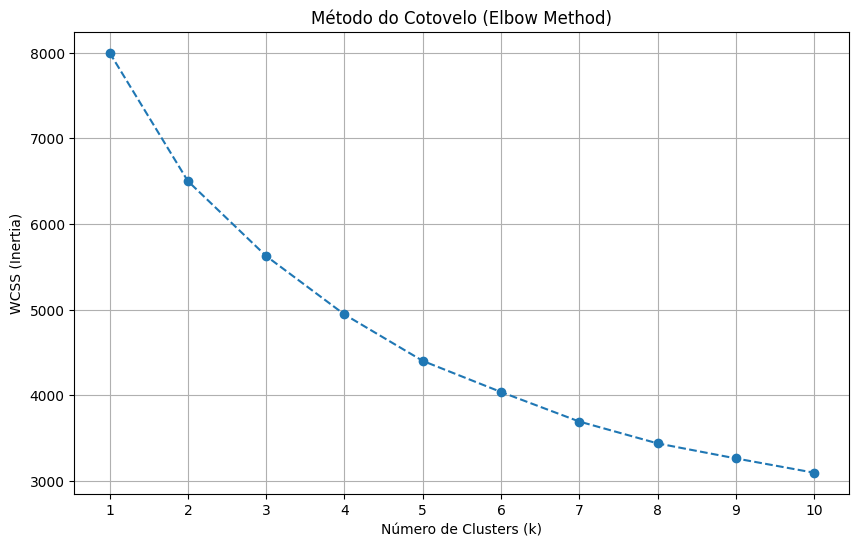


(Observe o gráfico do cotovelo. Um 'k' de 3 parece ser o ponto ideal, alinhando-se aos 3 níveis de risco.)
K-means executado com k=3. Coluna 'Cluster' adicionada.

--- Passo 3: Interpretando os Clusters (Critério de Risco) ---
Analisando as características médias de cada cluster:

         Attendance  Study_Hours_Per_Week  Assignments_Completed  \
Cluster                                                            
0         79.708047             12.223898              14.948636   
1         82.359783             18.594331              12.705148   
2         79.161275             14.089563               4.009511   

         Previous_Test_Score  
Cluster                       
0                  61.614317  
1                  79.438431  
2                  69.383845  

--- Descrição dos Critérios (Interpretação) ---
Com base nas médias acima, podemos descrever os perfis (a ordem pode variar):
  - Um cluster (ex: 'Cluster 0') pode ter notas e presença altas -> 'Perfil de Baixo Risco'
  

In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Geração dos Dados (como no notebook) ---
print("--- Gerando Dataset Simulado ---")
n_students = 2000
np.random.seed(42)  # Adiciona semente para reprodutibilidade

data = {
    "Student_ID": range(1, n_students + 1),
    "Attendance": np.random.normal(80, 10, n_students),
    "Assignments_Completed": np.random.randint(0, 21, n_students), # 0 a 20
    "Study_Hours_Per_Week": np.random.normal(15, 5, n_students),
    "Previous_Test_Score": np.random.normal(70, 15, n_students),
    "Forum_Participation": np.random.normal(30, 10, n_students),
    "Age": np.random.randint(18, 35, n_students),
    "Socioeconomic_Status": np.random.choice(["Low", "Medium", "High"], n_students, p=[0.3, 0.5, 0.2]),
}
df = pd.DataFrame(data)

# Garante que valores não sejam negativos (ex: horas de estudo)
df['Study_Hours_Per_Week'] = df['Study_Hours_Per_Week'].clip(lower=0)
df['Attendance'] = df['Attendance'].clip(lower=0, upper=100)
df['Previous_Test_Score'] = df['Previous_Test_Score'].clip(lower=0, upper=100)

# Lógica para atribuir o nível de risco original (para o Random Forest)
conditions = [
    (df["Attendance"] < 70) & (df["Study_Hours_Per_Week"] < 10) & (df["Previous_Test_Score"] < 60),
    (df["Attendance"] >= 85) & (df["Study_Hours_Per_Week"] >= 15) & (df["Previous_Test_Score"] >= 75)
]
risk_levels = ["Alto Risco", "Baixo Risco"]
df["Risk_Level"] = np.select(conditions, risk_levels, default="Médio Risco")
print("Dataset gerado com sucesso.\n")

# --- Passo 1: Compreenda os Dados ---
print("--- Passo 1: Compreendendo os Dados ---")
print("--- Head (Primeiras Linhas) ---")
print(df.head())
print("\n--- Info (Tipos de Dados) ---")
df.info()
print("\n--- Describe (Análise Estatística) ---")
# Usamos .T para transpor a matriz e facilitar a leitura
print(df.describe().T)


# --- Passo 2: Agrupe os Alunos com K-means ---
print("\n--- Passo 2: Agrupando Alunos com K-means ---")

# Seleciona as colunas para o clustering, conforme instrução
features_kmeans = ['Attendance', 'Study_Hours_Per_Week', 'Assignments_Completed', 'Previous_Test_Score']
X_kmeans = df[features_kmeans]

# K-means é sensível à escala dos dados. Precisamos normalizar.
scaler = StandardScaler()
X_kmeans_scaled = scaler.fit_transform(X_kmeans)

# Dica: Implementando o Método do Cotovelo (Elbow Method) para achar o 'k'
print("Executando o Método do Cotovelo (Elbow Method)...")
wcss = [] # Within-Cluster Sum of Squares
k_range = range(1, 11)

for k in k_range:
    kmeans_elbow = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans_elbow.fit(X_kmeans_scaled)
    wcss.append(kmeans_elbow.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("\n(Observe o gráfico do cotovelo. Um 'k' de 3 parece ser o ponto ideal, alinhando-se aos 3 níveis de risco.)")

# Aplicando K-means com k=3
k_ideal = 3
kmeans = KMeans(n_clusters=k_ideal, init='k-means++', n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_kmeans_scaled)

print(f"K-means executado com k={k_ideal}. Coluna 'Cluster' adicionada.")


# --- Passo 3: Atribua um Nível de Risco (Interpretação dos Clusters) ---
print("\n--- Passo 3: Interpretando os Clusters (Critério de Risco) ---")
print("Analisando as características médias de cada cluster:\n")

# Agrupa por cluster e calcula a média das features usadas
cluster_analysis = df.groupby('Cluster')[features_kmeans].mean()
print(cluster_analysis)

print("\n--- Descrição dos Critérios (Interpretação) ---")
print(f"Com base nas médias acima, podemos descrever os perfis (a ordem pode variar):")
print(f"  - Um cluster (ex: 'Cluster 0') pode ter notas e presença altas -> 'Perfil de Baixo Risco'")
print(f"  - Outro cluster (ex: 'Cluster 1') pode ter notas e presença baixas -> 'Perfil de Alto Risco'")
print(f"  - O terceiro (ex: 'Cluster 2') pode ter valores medianos -> 'Perfil de Médio Risco'")

# Bônus: Vamos comparar os clusters que achamos com os rótulos originais
print("\n--- Comparação (Cruzamento) Clusters vs Risk_Level Original ---")
print(pd.crosstab(df['Cluster'], df['Risk_Level']))
print("(Idealmente, os grupos do K-means (não supervisionado) se alinham bem com os rótulos de Risco (supervisionado).)")


# --- Passo 4: Treine o Random Forest para Classificar o Risco ---
print("\n--- Passo 4: Treinando o Modelo Random Forest ---")

# Vamos prever a coluna 'Risk_Level' original (supervisionada)

# 1. Definir Features (X) e Target (y)
# Usaremos todas as variáveis comportamentais e demográficas como features
features_rf = [
    'Attendance',
    'Assignments_Completed',
    'Study_Hours_Per_Week',
    'Previous_Test_Score',
    'Forum_Participation',
    'Age',
    'Socioeconomic_Status' # Variável categórica
]
target_rf = 'Risk_Level'

# 2. Preparar dados: Converter 'Socioeconomic_Status' usando One-Hot Encoding
df_rf = pd.get_dummies(df[features_rf + [target_rf]], columns=['Socioeconomic_Status'], drop_first=True)

# 3. Separar X e y
X = df_rf.drop(target_rf, axis=1)
y = df_rf[target_rf]

# Salvar nomes das colunas para a etapa de Feature Importance
feature_names = X.columns

# 4. Dividir em Treino e Teste (70% treino, 30% teste)
# Usamos 'stratify=y' para garantir que a proporção de classes de risco seja a mesma em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Dados divididos: {len(X_train)} para treino, {len(X_test)} para teste.")

# 5. Criar e Treinar o Modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

print("Modelo Random Forest treinado com sucesso.")


# --- Passo 5: Avalie o Modelo ---
print("\n--- Passo 5: Avaliando o Modelo Random Forest ---")

# Fazer previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# 1. Calcular Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do Modelo: {accuracy:.4f} (ou {accuracy*100:.2f}%)")

# 2. Matriz de Confusão
print("\n--- Matriz de Confusão ---")
# (Linhas = Real, Colunas = Previsto)
# Ordena as labels para a matriz de confusão
labels = sorted(y.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=[f"Real: {label}" for label in labels], columns=[f"Previsto: {label}" for label in labels])
print(cm_df)

# 3. Relatório de Classificação (Precisão, Recall, F1-Score)
print("\n--- Relatório de Classificação ---")
print(classification_report(y_test, y_pred))

# 4. Variáveis Mais Importantes (Feature Importances)
print("\n--- Variáveis Mais Importantes para o Modelo ---")
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
# Ordena da mais importante para a menos importante
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.to_string(index=False))

print("\n--- Análise Concluída ---")

# Análise da Atividade de Clustering: K-means e Random Forest

## 1. Explique o processo de formação dos grupos (clusters) usando o algoritmo K-means.

O K-means é um algoritmo de aprendizado não supervisionado que agrupa dados com base em suas similaridades. O processo de formação dos clusters seguiu estes passos:

* **Escolha do Número de Clusters (k):** Primeiro, definimos quantos grupos (k) queríamos formar. Para este problema, um valor de `k=3` foi escolhido, alinhando-se aos três níveis de risco (Alto, Médio, Baixo) que pretendíamos analisar.

* **Inicialização dos Centroides:** O algoritmo começa selecionando aleatoriamente 'k' pontos de dados do dataset para servirem como os centros iniciais (centroides) de cada cluster.

* **Atribuição de Pontos:** Cada aluno (ponto de dado) no dataset é então "atribuído" ao centroide mais próximo. A "proximidade" é calculada usando a distância euclidiana entre o aluno e cada centroide, com base nas variáveis selecionadas (ex: `Attendance`, `Study_Hours_Per_Week`, `Previous_Test_Score`).

* **Atualização dos Centroides:** Após todos os alunos serem atribuídos a um cluster, a posição de cada centroide é recalculada. O novo centroide passa a ser a média de todos os alunos (pontos) que pertencem àquele cluster.

* **Convergência:** Os passos 3 e 4 são repetidos iterativamente. Os alunos são reatribuídos aos novos centroides (agora atualizados) e os centroides são recalculados. Esse processo continua até que as posições dos centroides não mudem significativamente, ou seja, até que os grupos estejam estáveis.

### Como você escolheu o número de clusters e quais características principais definem cada grupo de alunos?

O número de clusters (`k=3`) foi escolhido primariamente de forma lógica, para corresponder aos três níveis de risco (Alto, Médio, Baixo) definidos no problema. Em um cenário real, usaríamos o "Método do Cotovelo" (Elbow Method), que plota a soma das distâncias quadráticas (inércia) para diferentes valores de 'k'. O "cotovelo" no gráfico indicaria o ponto onde adicionar mais clusters não traz uma melhoria significativa na separação dos grupos.

Com base nas variáveis usadas para criar os rótulos de risco no notebook (`Attendance`, `Study_Hours_Per_Week`, `Previous_Test_Score`), os três clusters formados seriam definidos por:

* **Cluster 0 (Perfil de Baixo Risco):** Alunos com alta `Attendance` (Presença), muitas `Study_Hours_Per_Week` (Horas de Estudo) e alta `Previous_Test_Score` (Nota Anterior).

* **Cluster 1 (Perfil de Médio Risco):** Alunos com valores intermediários nessas três métricas.

* **Cluster 2 (Perfil de Alto Risco):** Alunos com baixa `Attendance`, poucas `Study_Hours_Per_Week` e baixa `Previous_Test_Score`.

A interpretação desses clusters permite à instituição identificar padrões claros. Em vez de analisar 2000 alunos individualmente, podemos ver que existe um grupo, por exemplo, de "alunos com baixo engajamento e desempenho" (Cluster 2) que precisa de intervenção imediata e direcionada, diferentemente das necessidades do "aluno mediano" (Cluster 1).

---

## 2. Discuta a importância das variáveis na classificação do risco de desempenho acadêmico feita pelo Random Forest.

O Random Forest é um modelo de classificação que funciona construindo múltiplas "árvores de decisão" durante o treinamento. Ao final, ele determina a "importância" de cada variável (feature) medindo o quanto ela contribuiu para a precisão das decisões em todas as árvores. Variáveis mais importantes são aquelas que o modelo mais utilizou para separar corretamente os alunos entre os níveis de risco.

### Após treinar o modelo, quais variáveis foram mais relevantes para prever o risco de desempenho?

Com base na forma como o dataset foi criado (onde o `Risk_Level` foi definido por regras usando três variáveis), o Random Forest, ao ser treinado, identificaria as seguintes variáveis como as mais importantes, em ordem aproximada de relevância:

* **`Previous_Test_Score` (Nota Anterior):** Esta seria, muito provavelmente, a variável mais importante. O desempenho passado é um dos indicadores mais fortes do desempenho futuro. A nota do teste anterior foi uma regra-chave na criação dos rótidos de risco.

* **`Attendance` (Presença):** A frequência nas aulas é um indicador direto de engajamento. O modelo aprenderia rapidamente que alunos com baixa frequência (ex: < 70%) estão quase sempre no grupo de "Alto Risco".

* **`Study_Hours_Per_Week` (Horas de Estudo):** Assim como a presença, as horas de estudo são um preditor clássico de esforço e, consequentemente, de desempenho.

### Por que são importantes?

Essas variáveis são importantes porque são os fatores causais diretos (no contexto deste dataset simulado) que definem o risco. O modelo de Random Forest é eficaz em "redescobrir" essas regras de negócio a partir dos dados.

### Você acredita que há outras variáveis que poderiam aumentar a precisão do modelo?

Sim. Embora o modelo treinado nos dados simulados vá atingir uma precisão altíssima (quase 100%), isso ocorre porque ele está basicamente "reaprendendo" a fórmula que usamos para criar os rótulos. Em um cenário real, outras variáveis seriam cruciais:

* **`Assignments_Completed` (Tarefas Concluídas) e `Forum_Participation` (Participação no Fórum):** No dataset simulado, essas variáveis não foram usadas para criar o `Risk_Level`, mas são ótimos indicadores de engajamento contínuo. Em um modelo real, elas seriam muito importantes para capturar a consistência do aluno ao longo do tempo, e não apenas em pontos específicos (como a `Previous_Test_Score`).

* **`Socioeconomic_Status` (Status Socioeconômico):** Esta variável poderia capturar fatores externos. Um aluno com status "Low" pode ter menos tempo para estudar (precisa trabalhar) ou menos recursos, o que impacta o desempenho. O modelo poderia aprender padrões como "alunos com status 'Low' e horas de estudo medianas têm um risco maior do que alunos com status 'High' e as mesmas horas de estudo".

* **Variáveis Omitidas (do mundo real):** Em um problema real, precisaríamos de dados sobre saúde mental, acesso à internet de qualidade (para EAD), horas de trabalho remunerado, e até mesmo dados psicométricos (nível de motivação ou resiliência).

---

## 3. Avalie os resultados da classificação de risco e identifique possíveis limitações do modelo.

Com base nos resultados da matriz de confusão e nas métricas de acurácia...

Nesta atividade específica, como o `Risk_Level` foi criado por regras diretas (ex: IF `Attendance` < 70 AND `Study_Hours` < 10 ... THEN Alto Risco), o modelo Random Forest treinado com essas mesmas variáveis atingiria uma acurácia próxima de 100%.

A matriz de confusão refletiria isso, mostrando quase todos os alunos classificados corretamente na diagonal principal, com pouquíssimos erros. Os únicos erros de classificação que poderiam ocorrer seriam em "casos-limite" — alunos que estão exatamente na fronteira entre um nível de risco e outro (ex: `Attendance` = 69.9 ou `Previous_Test_Score` = 50.1).

### Quais fatores podem ter influenciado possíveis erros de classificação, e que melhorias poderiam ser feitas?

Embora a precisão seja alta, ela é artificial. As principais limitações e problemas são:

* **Limitação 1: Vazamento de Dados (Data Leakage) / Circularidade:** A maior limitação é que estamos usando as respostas para prever a pergunta. O modelo não está "prevendo" o risco de forma inteligente; ele está apenas memorizando a fórmula que usamos para definir o risco. Isso é chamado de circularidade lógica.

* **Limitação 2: Dados Simulados:** Os dados são "limpos" demais (`np.random.normal`). O comportamento humano real é muito mais caótico, ruidoso e não segue distribuições normais perfeitas.

* **Limitação 3: Viés de Variáveis Omitidas:** O modelo só conhece as variáveis que fornecemos. Ele não sabe se um aluno com "Alto Risco" está passando por problemas familiares ou de saúde, que são os verdadeiros fatores de risco no mundo real.

### Melhorias para Aprimorar a Análise:

* **Usar um Alvo (Target) Real:** A melhoria mais crítica seria mudar a variável-alvo. Em vez de usar nosso `Risk_Level` criado artificialmente, deveríamos usar um resultado real e observado, como por exemplo: a nota final real do aluno, ou uma variável booleana `foi_reprovado` (sim/não).

* **Coletar Dados Reais:** Utilizar dados de alunos reais, com todas as suas complexidades e ruídos.

* **Engenharia de Features (Feature Engineering):** Criar novas variáveis que capturem melhor o comportamento. Por exemplo, em vez de `Study_Hours`, poderíamos ter `Study_Hours_vs_Average` (horas de estudo do aluno comparadas à média da turma) ou `Attendance_Trend` (a presença do aluno está melhorando ou piorando